In [1]:
!nvidia-smi

Sat Aug 24 19:48:33 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   37C    P8              9W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
pip install torch==2.3.1+cu121 torchvision==0.18.1+cu121 torchaudio==2.3.1+cu121 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.0/781.0 MB 2.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 92.0 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 88.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 65.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 56.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 1.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 20.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 660.5 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.4/869.4 kB 6.0 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.81 🚀 Python-3.10.13 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5853.3/8062.4 GB disk)


In [5]:
!yolo train model=yolov8x.pt data='/kaggle/input/grocerydb-v2/data.yaml' epochs=30 imgsz=640 batch=16 plots=True

100%|█████████████████████████████████████████| 131M/131M [00:00<00:00, 213MB/s]
Ultralytics YOLOv8.2.81 🚀 Python-3.10.13 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/kaggle/input/grocerydb-v2/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False

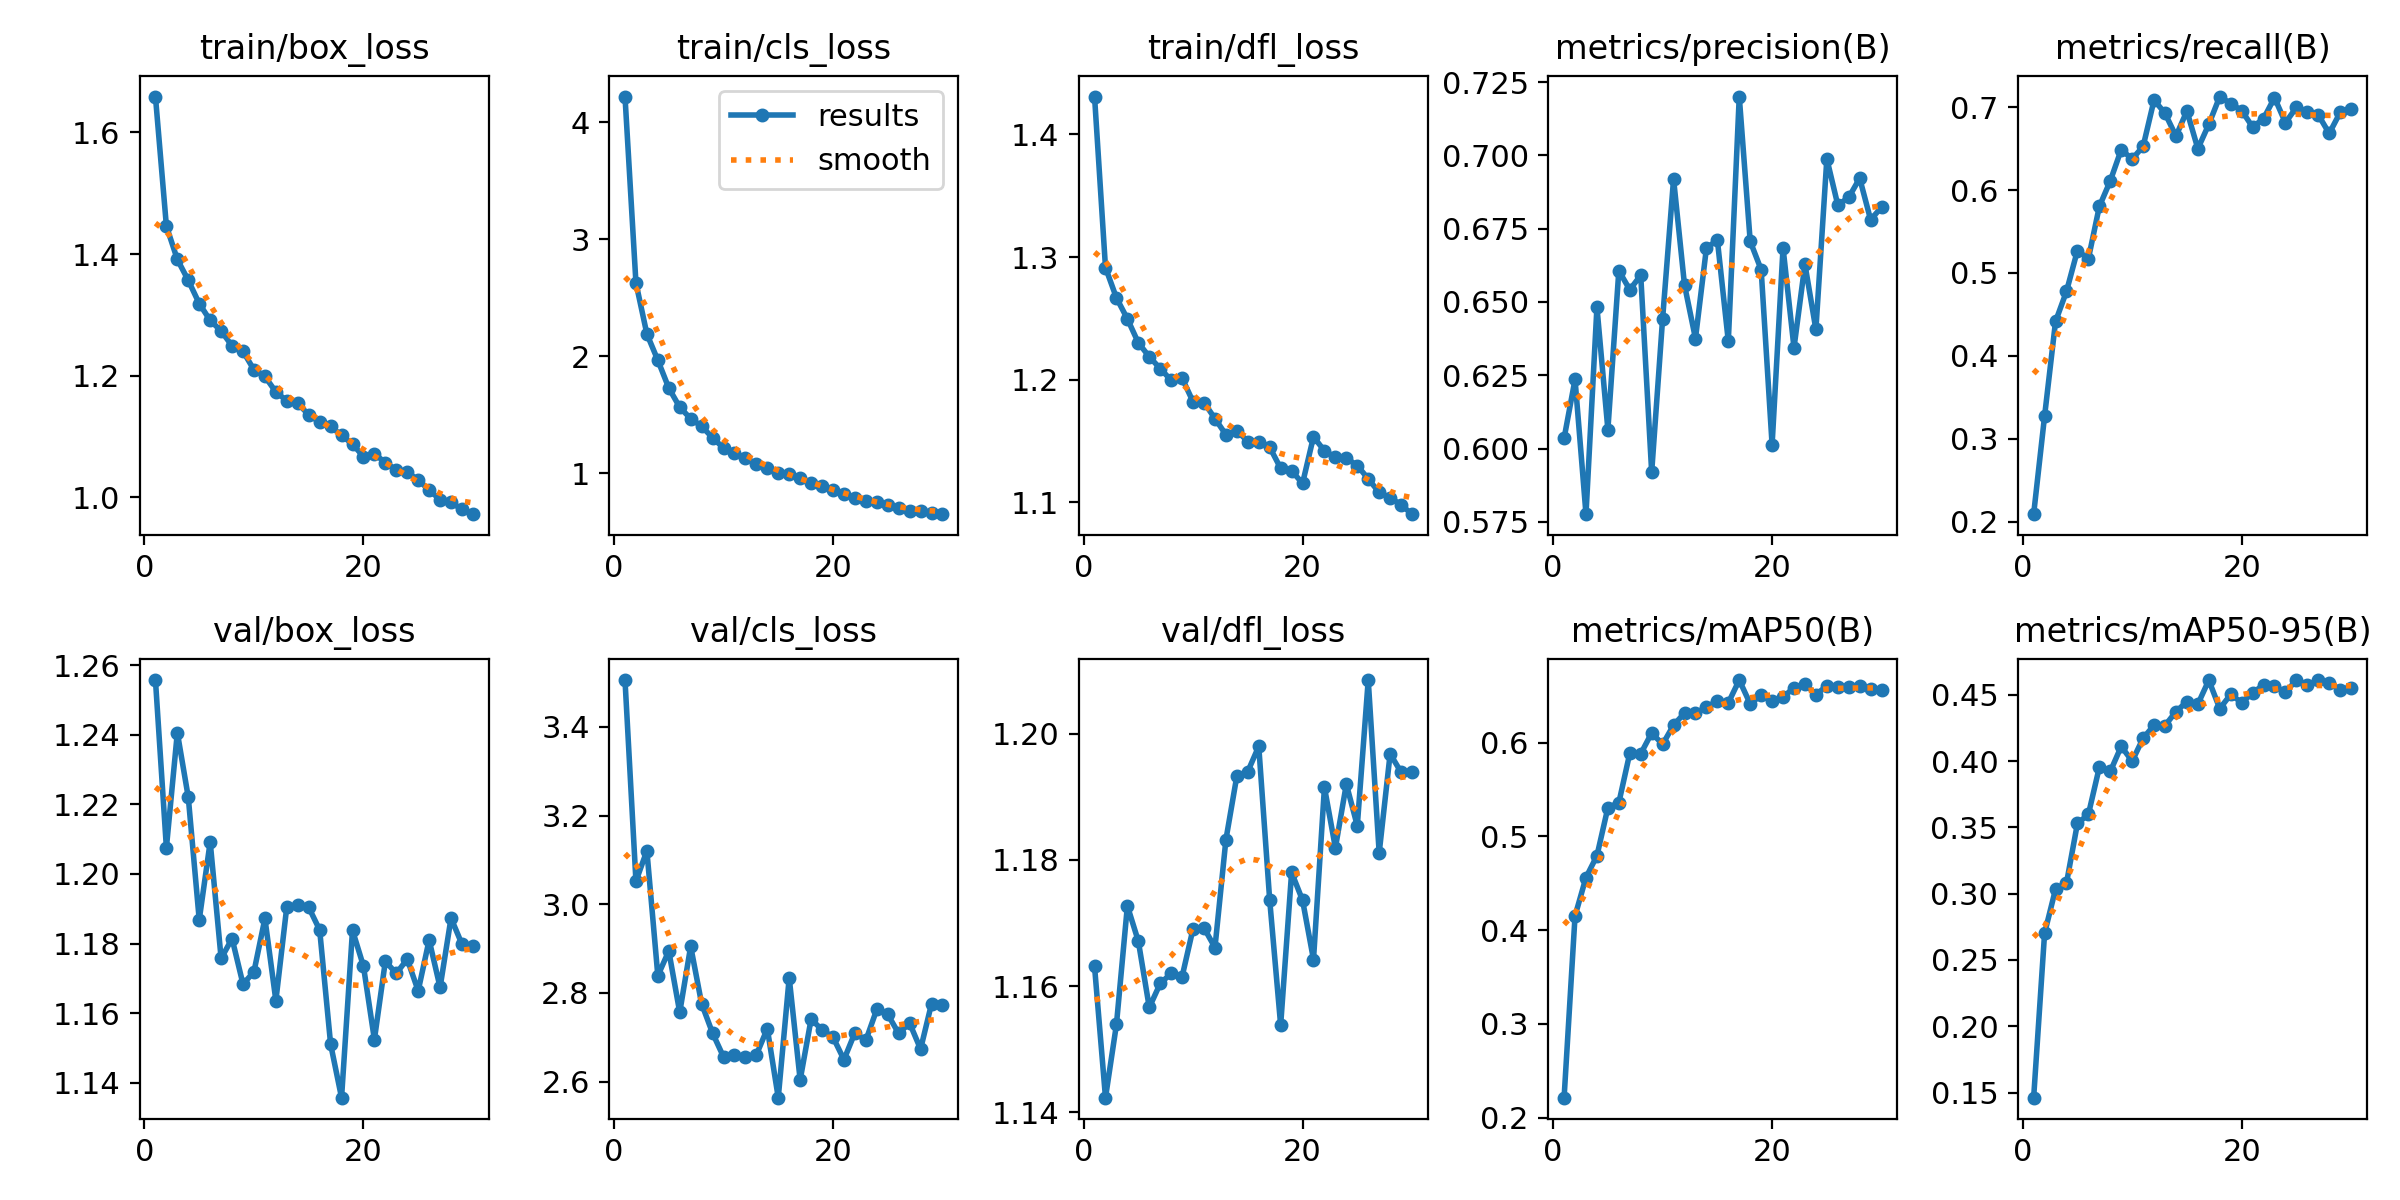

In [6]:
from IPython.display import display, Image
Image(filename='/kaggle/working/runs/detect/train/results.png', width=600)

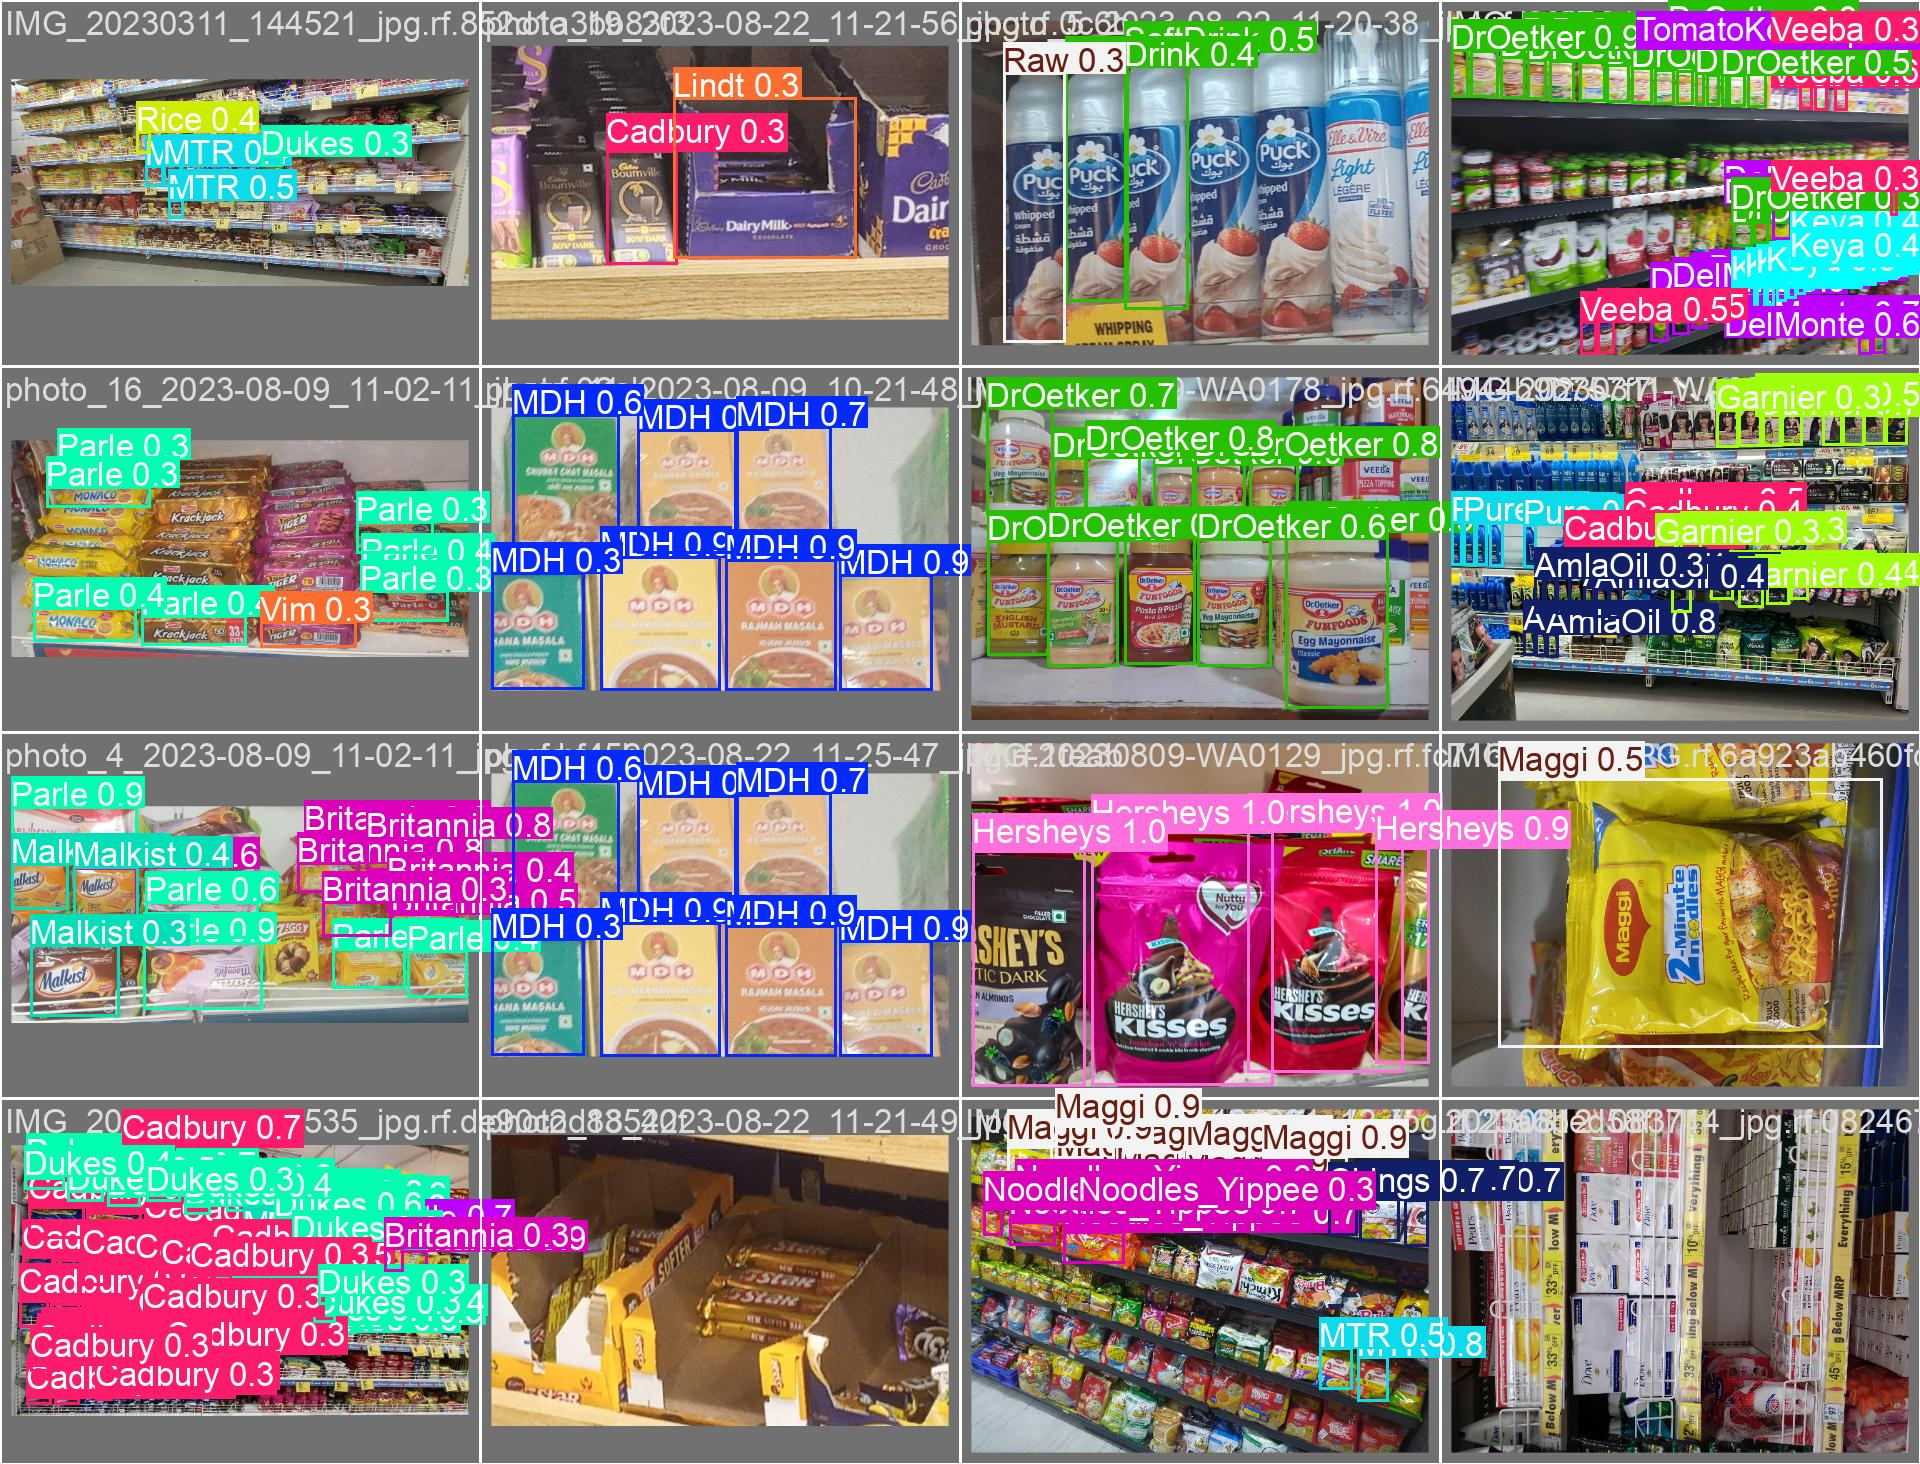

In [8]:
Image(filename='/kaggle/working/runs/detect/train/val_batch0_pred.jpg', width=600)

### !yolo task=detect mode=predict model=/kaggle/working/runs/detect/train3/weights/best.pt conf=0.25 source=/kaggle/input/grocery-items-v4-324/test/images

In [9]:
!yolo task=detect mode=predict model=/kaggle/working/runs/detect/train/weights/best.pt conf=0.25 source=/kaggle/input/grocerydb-v2/FullDatav2/test/images

Ultralytics YOLOv8.2.81 🚀 Python-3.10.13 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 268 layers, 68,245,869 parameters, 0 gradients, 258.1 GFLOPs

image 1/21 /kaggle/input/grocerydb-v2/FullDatav2/test/images/20230310_110845_jpg.rf.a4a04f02cc754ada235263c2306679cf.jpg: 480x640 (no detections), 82.8ms
image 2/21 /kaggle/input/grocerydb-v2/FullDatav2/test/images/20230702_135350_mp4-114_jpg.rf.7b22244b7adeefbbdd60720d93a3cf8e.jpg: 640x384 8 RedLabels, 86.4ms
image 3/21 /kaggle/input/grocerydb-v2/FullDatav2/test/images/20230702_135350_mp4-88_jpg.rf.ab35fa72023533386dfb8814a364d003.jpg: 640x384 11 RedLabels, 3 TataGolds, 59.2ms
image 4/21 /kaggle/input/grocerydb-v2/FullDatav2/test/images/20230702_140138_mp4-56_jpg.rf.89b69a923da1f51928f78e6d685fb070.jpg: 640x384 6 Enos, 5 ToothBrushs, 18 ToothPastes, 59.3ms
image 5/21 /kaggle/input/grocerydb-v2/FullDatav2/test/images/20230702_140657_mp4-51_jpg.rf.015fb759e4a6a486b48389835f9589ad.jpg: 640x384 9 Chingss, 4 Kissans, 2 T

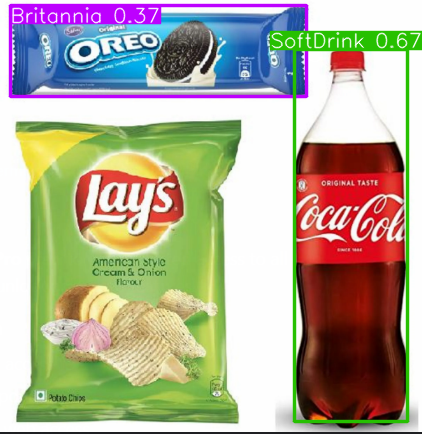

In [14]:
from IPython.display import display, Image
Image(filename='runs/detect/predict/layscocaoreo.png', width=600)

In [8]:
!yolo val model=/kaggle/input/grocery-detection-v2/pytorch/default/1/best.pt data=/kaggle/input/grocery-items-v4-324/data.yaml split=test

Ultralytics YOLOv8.2.79 🚀 Python-3.10.13 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 268 layers, 68,435,580 parameters, 0 gradients, 259.1 GFLOPs
100%|████████████████████████████████████████| 755k/755k [00:00<00:00, 14.2MB/s]
val: Scanning /kaggle/input/grocery-items-v4-324/test/labels... 23 images, 0 bac
val: WARNING ⚠️ Cache directory /kaggle/input/grocery-items-v4-324/test is not writeable, cache not saved.
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         23        326      0.736      0.849      0.858      0.599
               Aarambh          1          1      0.855          1      0.995      0.697
             Britannia          2         21      0.614      0.952      0.921      0.643
       Butter_AmulLite          1          7          1      0.486      0.995      0.651
      Butter_MilkyMist          1         12      0.765          1      0.995      0.782
      Butter_Nutralite          1 